In [1]:
import os
import topogenesis as tg
import pyvista as pv
import trimesh as tm
import pandas as pd
import numpy as np

In [2]:
# loading the envelope lattice from csv
lattice_path = os.path.relpath('../Data/dynamic output/voxelized_envelope.csv')
env_lattice = tg.lattice_from_csv(lattice_path)

In [3]:
# loading the sunaccess lattice from csv
lattice_path = os.path.relpath('../Data/raw data/sun_access.csv')
sun_acc_lattice = tg.lattice_from_csv(lattice_path)


In [10]:
env_lattice = sun_acc_lattice > 0.0

In [11]:
p = pv.Plotter(notebook=True)

base_lattice = env_lattice

# Set the grid dimensions: shape + 1 because we want to inject our values on the CELL data
grid = pv.UniformGrid()
grid.dimensions = np.array(base_lattice.shape) + 1
# The bottom left corner of the data set
grid.origin = base_lattice.minbound - base_lattice.unit * 0.5
# These are the cell sizes along each axis
grid.spacing = base_lattice.unit 

# adding the boundingbox wireframe
p.add_mesh(grid.outline(), color="grey", label="Domain")

# adding the availability lattice
env_lattice.fast_vis(p)

# adding axes
p.add_axes()
p.show_bounds(grid="back", location="back", color="#aaaaaa")

def create_mesh(value):
    lattice = (sun_acc_lattice < value) * env_lattice
    
    # Add the data values to the cell data
    grid.cell_arrays["Agents"] = lattice.flatten(order="F").astype(int)  # Flatten the array!
    # filtering the voxels
    threshed = grid.threshold([0.9, 1.1])
    # adding the voxels
    p.add_mesh(threshed, name='sphere', show_edges=True, opacity=1.0, show_scalar_bar=False)

    return

p.add_slider_widget(create_mesh, [0, 1], title='zon', value=0, event_type="always", style="classic")
p.show(use_ipyvtk=True)

  File "C:\Users\olivi\AppData\Local\Temp/ipykernel_15292/3988484454.py", line 31, in create_mesh
    p.add_mesh(threshed, name='sphere', show_edges=True, opacity=1.0, show_scalar_bar=False)
  File "C:\Users\olivi\anaconda3\envs\scds\lib\site-packages\pyvista\plotting\plotting.py", line 1567, in add_mesh
    raise ValueError('Empty meshes cannot be plotted. Input mesh has zero points.')
ValueError: Empty meshes cannot be plotted. Input mesh has zero points.


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(247.21077512227743, 152.21077512227743, 232.21077512227743),
 (35.0, -60.0, 20.0),
 (0.0, 0.0, 1.0)]

[[[0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]
  [0.       0.       0.       0.       0.      ]]

 [[0.       0.       0.       0.       0.      ]
  [0.       0.448052 0.837662 0.935065 0.      ]
  [0.       0.707792 0.876623 0.948052 0.      ]
  [0.       0.753247 0.902597 0.954545 0.      ]
  [0.       0.753247 0.928571 0.987013 0.      ]
  [0.       0.792208 0.941558 0.987013 0.      ]
  [0.       0.805195 0.948052 0.987013 0.      ]
  [0.       0.824675 0.954545 0.987013 0.      ]
  [0.       0.772727 0.961039 0.987013 0.      ]]

 [[0.       0.       0.       0.       0.      ]
  [0.       0.616883 0.818182 0.922078 0.      ]
  [0.       0.72

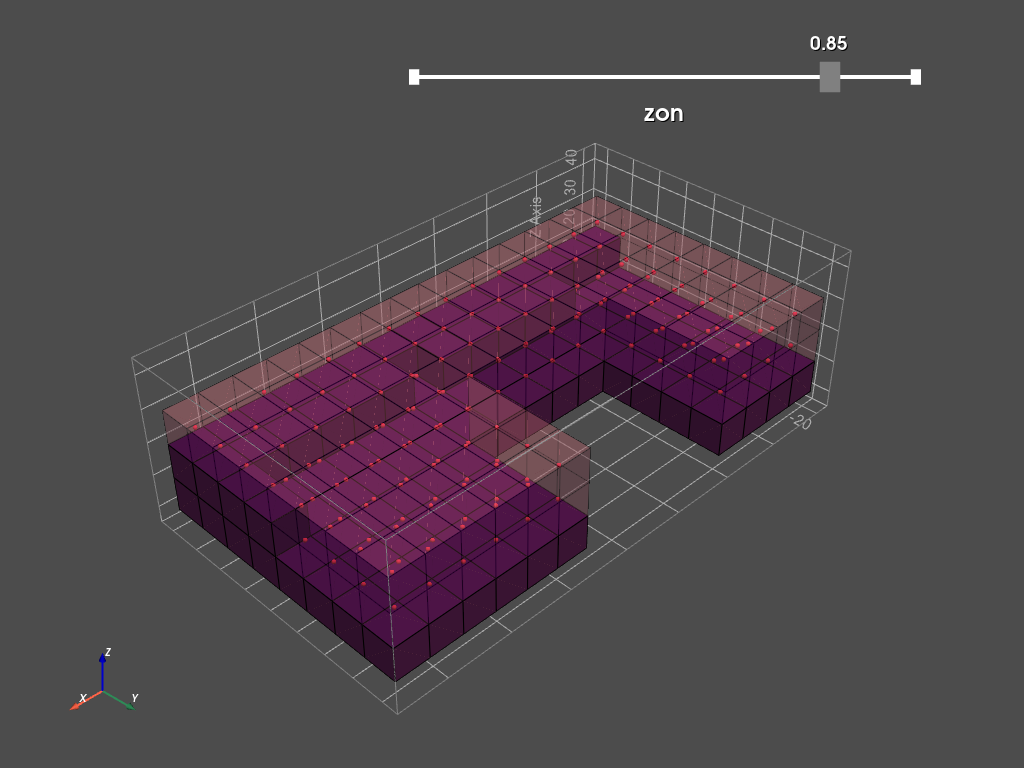

[(247.21077512227743, 152.21077512227743, 232.21077512227743),
 (35.0, -60.0, 20.0),
 (0.0, 0.0, 1.0)]

In [12]:
sun_acc_lattice_flat = sun_acc_lattice.flatten()
print(sun_acc_lattice)
print(sun_acc_lattice_flat)
for i in range(len(sun_acc_lattice_flat)):
    if sun_acc_lattice_flat[i] < 0.75: #vary this value to increase or decrease the envelope size
        sun_acc_lattice_flat[i] = False
    else: 
        sun_acc_lattice_flat[i] = True
#print(sun_acc_lattice_flat)
sun_acc_lattice_bool = (sun_acc_lattice_flat > 0).tolist() 
#print(sun_acc_lattice_bool)
sun_acc_lattice_bool = np.array(sun_acc_lattice_bool) #array conversion
#print(sun_acc_lattice_bool)
sun_acc_lattice_bool = sun_acc_lattice_bool.reshape(sun_acc_lattice.shape) #lattice shape
#print(sun_acc_lattice_bool)
sun_acc_lattice_minmax = tg.to_lattice(sun_acc_lattice_bool, sun_acc_lattice) #lattice creation

#p = pv.Plotter(notebook=True)
p.show()

In [7]:
#Visualizing the final envelope
print(sun_acc_lattice_minmax)
# convert mesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

# Visualize the mesh using pyvista plotter
#######

# initiating the plotter
p = pv.Plotter(notebook=True)

# fast visualization of the lattice
sun_acc_lattice_minmax.fast_vis(p)

# adding the meshes
p.add_mesh(tri_to_pv(context_mesh), opacity=0.1, style='wireframe')

[[[False False False False False]
  [False False False False False]
  [False False False False False]
  [False False False False False]
  [False False False False False]
  [False False False False False]
  [False False False False False]
  [False False False False False]
  [False False False False False]]

 [[False False False False False]
  [False False  True  True False]
  [False False  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]]

 [[False False False False False]
  [False False  True  True False]
  [False False  True  True False]
  [False False  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]]

 [[False False False False False]
  [False False  True  True False]
  [False

NameError: name 'context_mesh' is not defined